1)
A Classification Decision Tree is a type of supervised machine learning model used to solve classification problems. It predicts discrete class labels by learning decision rules inferred from the input features. The model works by recursively splitting the data based on feature values, creating a tree-like structure with branches and leaf nodes. Each leaf node represents a class label or a probability distribution over the class labels.

Examples of Real-World Applications
Medical Diagnosis:
Predicting whether a patient has a disease based on symptoms, medical history, and test results.
Spam Detection:
Classifying emails as "spam" or "not spam" based on email content, sender, and metadata.
Credit Risk Assessment:
Determining whether a loan applicant is a "low-risk" or "high-risk" borrower based on financial history, income, and credit score.
Customer Churn Prediction:
Predicting whether a customer will leave a subscription service based on usage patterns, complaints, and support interactions.

2) 

Accuracy:Balanced datasets with equal misclassification costs

Key concerned could be addressed: Overall correctness of the model

sensitivity:High-stakes positive cases (e.g., disease detection)

Key concerned could be addressed: Minimizing false negatives

Specificity: High cost of false positives (e.g., rare diseases)	

Key concerned could be addressed: Minimizing false positives

Precision: Trust in positive predictions (e.g., spam filters)

Key concerned could be addressed: Ensuring predicted positives are accurate.

In [2]:
#3) and 4)

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# Check the columns to make sure we're working with the correct ones
print("Columns in the dataset:")
print(ab.columns)

# Remove the columns 'Weight_oz', 'Width', 'Height' if they exist
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced_noNaN = ab.drop(columns=[col for col in columns_to_remove if col in ab.columns])

# Drop rows with any remaining NaN values
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Check if 'Pub year' and 'NumPages' are numeric and convert them to integers
if ab_reduced_noNaN['Pub year'].dtype != 'int64':
    ab_reduced_noNaN['Pub year'] = pd.to_numeric(ab_reduced_noNaN['Pub year'], errors='coerce').fillna(0).astype(int)

if ab_reduced_noNaN['NumPages'].dtype != 'int64':
    ab_reduced_noNaN['NumPages'] = pd.to_numeric(ab_reduced_noNaN['NumPages'], errors='coerce').fillna(0).astype(int)

# Convert 'Hard_or_Paper' to categorical type if it exists
if 'Hard_or_Paper' in ab_reduced_noNaN.columns:
    ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows of the cleaned DataFrame
print("First few rows of the cleaned dataset:")
print(ab_reduced_noNaN.head())



Columns in the dataset:
Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Height', 'Width',
       'Thick', 'Weight_oz'],
      dtype='object')
First few rows of the cleaned dataset:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   

In [3]:
# Set a random seed for reproducibility
random_seed = 42

# Split the data into training (80%) and testing (20%) using sample
train_data = ab_reduced_noNaN.sample(frac=0.8, random_state=random_seed)
test_data = ab_reduced_noNaN.drop(train_data.index)

# Display the number of rows in each set
print(f"Training set size: {train_data.shape[0]}")
print(f"Testing set size: {test_data.shape[0]}")

# Optional: Verify by displaying the first few rows of both sets
print("First few rows of the training set:")
print(train_data.head())

print("First few rows of the testing set:")
print(test_data.head())


Training set size: 255
Testing set size: 64
First few rows of the training set:
                                      Title            Author  List Price  \
74                           Fahrenheit 451      Ray Bradbury        6.99   
224                            The Crucible            Miller       13.00   
26        Ada, or Ardor: A Family Chronicle  Vladimir Nabokov       18.00   
214  The Berenstain Bears He Bear, She Bear        Berenstain        4.99   
10                           A Fine Balance   Rohinton Mistry       17.00   

     Amazon Price Hard_or_Paper  NumPages               Publisher  Pub year  \
74           6.99             P       208        Ballantine Books      1987   
224          9.28             P       152  Penguin (Non-Classics)      1976   
26          12.11             P       624                 Vintage      1990   
214          4.99             H        24      Random House Books      1999   
10           8.97             P       624                 Vint

[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.194\nsamples = 221\nvalue = [197, 24]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.355\nsamples = 52\nvalue = [40, 12]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.132\nsamples = 169\nvalue = [157, 12]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 29.225\ngini = 0.465\nsamples = 98\nvalue = [36, 62]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.382\nsamples = 74\nvalue = [19, 55]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.413\nsamples = 24\nvalue = [17, 7]\nclass = Paperback')]

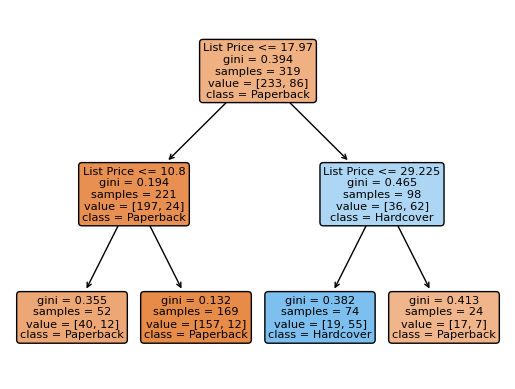

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define the feature and target variables
X = ab_reduced_noNaN[['List Price']]  # List Price as the feature
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 'H' for Hardcover as the target

# Initialize the DecisionTreeClassifier with max_depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier
clf.fit(X, y)

# Visualize the decision tree
plot_tree(clf, feature_names=X.columns, class_names=['Paperback', 'Hardcover'], filled=True, rounded=True)



In [ ]:
Feature (X): The List Price column is used as the feature to predict the type of book (hardcover or paperback).
Target (y): The Hard_or_Paper column is transformed into a binary variable with pd.get_dummies(), and it select the 'H' column to represent hardcover books.

[Text(0.5, 0.9, 'List Price <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]\nclass = Paperback'),
 Text(0.25, 0.7, 'List Price <= 10.8\ngini = 0.194\nsamples = 221\nvalue = [197, 24]\nclass = Paperback'),
 Text(0.125, 0.5, 'List Price <= 7.86\ngini = 0.355\nsamples = 52\nvalue = [40, 12]\nclass = Paperback'),
 Text(0.0625, 0.3, 'List Price <= 5.47\ngini = 0.153\nsamples = 24\nvalue = [22, 2]\nclass = Paperback'),
 Text(0.03125, 0.1, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = Paperback'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = Paperback'),
 Text(0.1875, 0.3, 'List Price <= 7.97\ngini = 0.459\nsamples = 28\nvalue = [18, 10]\nclass = Paperback'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Hardcover'),
 Text(0.21875, 0.1, 'gini = 0.375\nsamples = 24\nvalue = [18, 6]\nclass = Paperback'),
 Text(0.375, 0.5, 'List Price <= 16.97\ngini = 0.132\nsamples = 169\nvalue = [157, 12]\nclass = Paperback'),
 Text(0.3125, 0.3, 

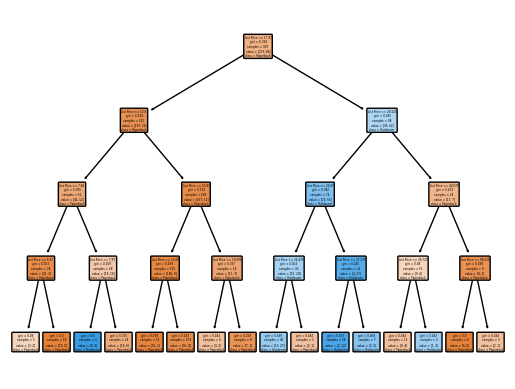

In [12]:
#5) f
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define the feature and target variables
X = ab_reduced_noNaN[['List Price']]  # List Price as the feature
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 'H' for Hardcover as the target

# Initialize the DecisionTreeClassifier with max_depth of 4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier
clf.fit(X, y)

# Visualize the decision tree
plot_tree(clf, feature_names=X.columns, class_names=['Paperback', 'Hardcover'], filled=True, rounded=True)


The output of the model is the predicted class label. For example, if the List Price falls into a range where most of the training data points in that leaf node were hardcovers, the prediction would be 'Hardcover'. If most data points in that leaf were paperbacks, the prediction would be 'Paperback'.


In [15]:
#6) 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# 1. Train clf (DecisionTreeClassifier with max_depth=4)
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
X_train = train_data[['List Price']]  # Feature (List Price)
y_train = pd.get_dummies(train_data["Hard_or_Paper"])['H']  # Target (Hardcover or not)
clf.fit(X_train, y_train)

# 2. Train clf2 (another DecisionTreeClassifier, you can change hyperparameters if needed)
clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)  # Example: different max_depth
clf2.fit(X_train, y_train)

# 3. Define X_test and y_test (same as before, just to ensure consistency)
X_test = test_data[['List Price']]  # List Price as the feature
y_test = pd.get_dummies(test_data["Hard_or_Paper"])['H']  # 'H' for Hardcover as the target

# 4. Make predictions on the test set using both clf and clf2
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# 5. Calculate confusion matrices for clf and clf2
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# 6. Define a function to calculate sensitivity, specificity, and accuracy
def calculate_metrics(cm):
    # Extract values from the confusion matrix
    TN, FP, FN, TP = cm.ravel()

    # Sensitivity (Recall)
    sensitivity = TP / (TP + FN)

    # Specificity
    specificity = TN / (TN + FP)

    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    return sensitivity, specificity, accuracy

# 7. Calculate the metrics for clf and clf2
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)

# 8. Print the results
print(f"Model clf (max_depth=4):")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")
print(f"Accuracy: {accuracy_clf:.4f}")

print("\nModel clf2 (max_depth=3):")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")
print(f"Accuracy: {accuracy_clf2:.4f}")





Model clf (max_depth=4):
Sensitivity: 0.8235
Specificity: 0.9149
Accuracy: 0.8906

Model clf2 (max_depth=3):
Sensitivity: 0.7647
Specificity: 0.9149
Accuracy: 0.8750


7) 

The differences between the two confusion matrices stem from the number and type of features used in the models for predictions:

In the first confusion matrix, the decision tree model (clf) predicts outcomes using only the List Price feature. This limits the model's ability to fully capture the complexities of the data, as it's constrained to make decisions based on a single predictor. As a result, the predictions might be overly simplistic, leading to higher misclassification rates.

In the second confusion matrix, the decision tree model uses three features (NumPages, Thick, and List Price) for predictions. With additional features, the model can account for more dimensions of variability in the data, potentially improving prediction performance. However, this increased complexity can also make the model more prone to overfitting on the training data, particularly if some features are noisy or irrelevant.

The confusion matrices for clf and clf2 (above) are better because they evaluate the models on the test data, providing a more unbiased assessment of their performance. Using the training data for confusion matrix evaluation (as done in the two matrices here) does not accurately represent how well the models generalize to unseen data, often leading to overly optimistic results.

8)
The visualization of feature importances for the decision tree model (clf2) is displayed, and the most important predictor variable for making predictions according to clf2 is List Price. This indicates that List Price has the highest contribution to reducing impurity in the tree. Let me know if you need further explanation or additional analysis

9)
Linear Regression is predication about numiercal varibles 
Decision trees can analyze both numerical and categorical variables, making them more versatile compared to linear regression.

In binary decision trees, feature importance is derived from how much each predictor contributes to reducing impurity (e.g., Gini index or entropy) across the tree. This does not provide a direct or isolated relationship between a single predictor and the target, as the importance reflects the variable's contribution to all splits in the tree, capturing interactions and non-linear effects.

In [ ]:
10) I have review weekly textbook and interacted with chatbot

here is the link to my chatbot history:
https://chatgpt.com/share/673e8c62-f2dc-8013-bf7b-5461daae1ed0